# Part 1 - Analytical Option Formulae

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

> ### Black Scholes

In [2]:
class BlackScholes:
    
    def __init__(self, S, K, sigma, T, r):
        self.S = S
        self.K = K
        self.sigma = sigma
        self.T = T
        self.r = r
        
        self.d1 = \
                (np.log(self.S/self.K) + \
                (self.r + (self.sigma**2/2))*self.T) / (self.sigma * np.sqrt(self.T))
        self.d2 = \
                self.d1 - (self.sigma * np.sqrt(self.T))   
        
    def PriceVanila(self, option_type):
        if str.strip(option_type).lower() == 'call':
            N_d1 = norm.cdf(self.d1)
            N_d2 = norm.cdf(self.d2)    
            Price = \
                (self.S * N_d1) - (self.K * np.exp(-self.r * self.T) * N_d2)        
            #print(f'Value of a Call Option is {round(Price, 3)}$')
            
        elif str.strip(option_type).lower() == 'put':
            N_d1 = norm.cdf(-self.d1)        
            N_d2 = norm.cdf(-self.d2)        
            Price = \
                (self.K * np.exp(-self.r * self.T) * N_d2) - (self.S * N_d1)
            #print(f'Value of a Put Option is {round(Price, 3)}$')
            
        else:
            print('Please input the option type in correct format')
            return None
            
        return Price
    
    def PriceCashOrNothing(self, fixed_value, option_type):
        if str.strip(option_type).lower() == 'call':
            N_d2 = norm.cdf(self.d2)    
            Price = \
                fixed_value * np.exp(-self.r * self.T) * N_d2        
            #print(f'Value of a Call Option is {round(Price, 3)}$')
            
        elif str.strip(option_type).lower() == 'put':       
            N_d2 = norm.cdf(-self.d2)        
            Price = \
                fixed_value * np.exp(-self.r * self.T) * N_d2
            #print(f'Value of a Put Option is {round(Price, 3)}$')
            
        else:
            print('Please input the option type in correct format')
            return None
            
        return Price
    
    def PriceAssetOrNothing(self, option_type):
        if str.strip(option_type).lower() == 'call':
            N_d1 = norm.cdf(self.d1)    
            Price = \
                self.S * np.exp(-self.r * self.T) * N_d1        
            #print(f'Value of a Call Option is {round(Price, 3)}$')

        elif str.strip(option_type).lower() == 'put':       
            N_d1 = norm.cdf(-self.d1)        
            Price = \
                self.S * np.exp(-self.r * self.T) * N_d1
            #print(f'Value of a Put Option is {round(Price, 3)}$')

        else:
            print('Please input the option type in correct format')
            return None

        return Price

> ### Bachelier

In [3]:
class Bachelier:
    
    def __init__(self, S, K, sigma, T, r):
        self.S = S
        self.K = K
        self.sigma = sigma
        self.T = T
        self.r = r
        
        self.d1 = \
            (self.S - self.K)/(self.sigma * np.sqrt(self.T))

    def PriceVanila(self, option_type):
        if str.strip(option_type).lower() == 'call':
            N_d1 = norm.cdf(self.d1)
            n_d1 = norm.pdf(self.d1)
            
            Price = \
                np.exp(-self.r*self.T) * (((self.S - self.K)*N_d1) + \
                (self.sigma * np.sqrt(self.T) * n_d1))

            #print(f'Value of a Call Option is {round(Price, 3)}$')

        elif str.strip(option_type).lower() == 'put':
            N_d1 = norm.cdf(-self.d1)
            n_d1 = norm.pdf(self.d1)

            Price = \
                np.exp(-self.r*self.T) * (((self.K - self.S)*N_d1) + \
                (self.sigma * np.sqrt(self.T) * n_d1))

            #print(f'Value of a Call Option is {round(Price, 3)}$')

        else:
            print('Please input the option type in correct format')
            return None
            
        return Price
    
    def PriceCashOrNothing(self, option_type):
        if str.strip(option_type).lower() == 'call':
            N_d1 = norm.cdf(self.d1)
            
            Price = \
                np.exp(-self.r*self.T) * N_d1

            #print(f'Value of a Call Option is {round(Price, 3)}$')

        elif str.strip(option_type).lower() == 'put':
            N_d1 = norm.cdf(-self.d1)

            Price = \
                np.exp(-self.r*self.T) * N_d1

            #print(f'Value of a Call Option is {round(Price, 3)}$')

        else:
            print('Please input the option type in correct format')
            return None
            
        return Price      
    
    def PriceAssetOrNothing(self, option_type):
        if str.strip(option_type).lower() == 'call':
            N_d1 = norm.cdf(self.d1)
            n_d1 = norm.pdf(self.d1)
            
            Price = \
                np.exp(-self.r*self.T) * ((self.S*N_d1) + \
                (self.sigma * np.sqrt(self.T) * n_d1))

            #print(f'Value of a Call Option is {round(Price, 3)}$')

        elif str.strip(option_type).lower() == 'put':
            N_d1 = norm.cdf(-self.d1)
            n_d1 = norm.pdf(self.d1)

            Price = \
                np.exp(-self.r*self.T) * ((self.S*N_d1) - \
                (self.sigma * np.sqrt(self.T) * n_d1))

            #print(f'Value of a Call Option is {round(Price, 3)}$')

        else:
            print('Please input the option type in correct format')
            return None
            
        return Price     

> ### Black76

In [4]:
class Black76:
    
    def __init__(self, F, K, sigma, T, r):
        self.F = F
        self.K = K
        self.sigma = sigma
        self.T = T
        self.r = r
        
        self.d1 = \
                (np.log(self.F/self.K) + \
                (self.sigma**2/2)*self.T) / (self.sigma * np.sqrt(self.T))
        self.d2 = \
                self.d1 - (self.sigma * np.sqrt(self.T))   
        
    def PriceVanila(self, option_type):
        if str.strip(option_type).lower() == 'call':
            N_d1 = norm.cdf(self.d1)
            N_d2 = norm.cdf(self.d2)    
            Price = \
                np.exp(-self.r * self.T)*(self.F * N_d1 - self.K * N_d2)      
            #print(f'Value of a Call Option is {round(Price, 3)}$')
            
        elif str.strip(option_type).lower() == 'put':
            N_d1 = norm.cdf(-self.d1)        
            N_d2 = norm.cdf(-self.d2)        
            Price = \
                 np.exp(-self.r * self.T)*(self.K * N_d2 - self.F * N_d1)
            #print(f'Value of a Put Option is {round(Price, 3)}$')
            
        else:
            print('Please input the option type in correct format')
            return None
            
        return Price
    
    def PriceCashOrNothing(self, fixed_value, option_type):
        if str.strip(option_type).lower() == 'call':
            N_d2 = norm.cdf(self.d2)    
            Price = \
                fixed_value * np.exp(-self.r * self.T) * N_d2        
            #print(f'Value of a Call Option is {round(Price, 3)}$')
            
        elif str.strip(option_type).lower() == 'put':       
            N_d2 = norm.cdf(-self.d2)        
            Price = \
                fixed_value * np.exp(-self.r * self.T) * N_d2
#             #print(f'Value of a Put Option is {round(Price, 3)}$')
            
        else:
            print('Please input the option type in correct format')
            return None
            
        return Price
    
    def PriceAssetOrNothing(self, option_type):
        if str.strip(option_type).lower() == 'call':
            N_d1 = norm.cdf(self.d1)    
            Price = \
                self.F * np.exp(-self.r * self.T) * N_d1        
            #print(f'Value of a Call Option is {round(Price, 3)}$')

        elif str.strip(option_type).lower() == 'put':       
            N_d1 = norm.cdf(-self.d1)        
            Price = \
                self.F * np.exp(-self.r * self.T) * N_d1
            #print(f'Value of a Put Option is {round(Price, 3)}$')

        else:
            print('Please input the option type in correct format')
            return None

        return Price

> ### Displaced Diffusion

In [5]:
class DisplacedDiffusion:
    
    def __init__(self, F, K, sigma, T, r, beta):
        self.F = F/beta
        self.K = K + ((1-beta)/beta)*F
        self.sigma = sigma*beta
        self.T = T
        self.r = r
        self.beta = beta
        
        self.d1 = \
                (np.log(self.F/self.K) + \
                (self.sigma**2/2)*self.T) / (self.sigma * np.sqrt(self.T))
        self.d2 = \
                self.d1 - (self.sigma * np.sqrt(self.T))   
        
    def PriceVanila(self, option_type):
        if str.strip(option_type).lower() == 'call':
            N_d1 = norm.cdf(self.d1)
            N_d2 = norm.cdf(self.d2)    
            Price = \
                np.exp(-self.r * self.T)*(self.F * N_d1 - self.K * N_d2)      
            #print(f'Value of a Call Option is {round(Price, 3)}$')
            
        elif str.strip(option_type).lower() == 'put':
            N_d1 = norm.cdf(-self.d1)        
            N_d2 = norm.cdf(-self.d2)        
            Price = \
                 np.exp(-self.r * self.T)*(self.K * N_d2 - self.F * N_d1)
            #print(f'Value of a Put Option is {round(Price, 3)}$')
            
        else:
            print('Please input the option type in correct format')
            return None
            
        return Price
    
    def PriceCashOrNothing(self, fixed_value, option_type):
        if str.strip(option_type).lower() == 'call':
            N_d2 = norm.cdf(self.d2)    
            Price = \
                fixed_value * np.exp(-self.r * self.T) * N_d2        
            #print(f'Value of a Call Option is {round(Price, 3)}$')
            
        elif str.strip(option_type).lower() == 'put':       
            N_d2 = norm.cdf(-self.d2)        
            Price = \
                fixed_value * np.exp(-self.r * self.T) * N_d2
#             #print(f'Value of a Put Option is {round(Price, 3)}$')
            
        else:
            print('Please input the option type in correct format')
            return None
            
        return Price
    
    def PriceAssetOrNothing(self, option_type):
        if str.strip(option_type).lower() == 'call':
            N_d1 = norm.cdf(self.d1)    
            Price = \
                self.F * self.beta * np.exp(-self.r * self.T) * N_d1        
            #print(f'Value of a Call Option is {round(Price, 3)}$')

        elif str.strip(option_type).lower() == 'put':       
            N_d1 = norm.cdf(-self.d1)        
            Price = \
                self.F * self.beta * np.exp(-self.r * self.T) * N_d1
            #print(f'Value of a Put Option is {round(Price, 3)}$')

        else:
            print('Please input the option type in correct format')
            return None

        return Price

> ### Vanilla Call/Put

In [6]:
T = 30/365
sigma = 0.3
K = 105
r = 0.01
S = np.linspace(90, 110, 100)
F = S*np.exp(r*T)

#displaced-diffusion:
beta = 0.9999

In [7]:
call_b76 = []
for i in range(len(S)):
    black76 = Black76(F[i], K, sigma, T, r)
    call_b76.append(black76.PriceVanila('call'))
    
call_b = []
for i in range(len(S)):
    blackscholes = BlackScholes(S[i], K, sigma, T, r)
    call_b.append(blackscholes.PriceVanila('call'))

call = []
for i in range(len(S)):
    bachelier = Bachelier(S[i], K, sigma*S[i], T, r)
    call.append(bachelier.PriceVanila('call'))
    
call_dd = []
for i in range(len(S)):
    displacedD = DisplacedDiffusion(F[i], K, sigma, T, r, beta)
    call_dd.append(displacedD.PriceVanila('call'))

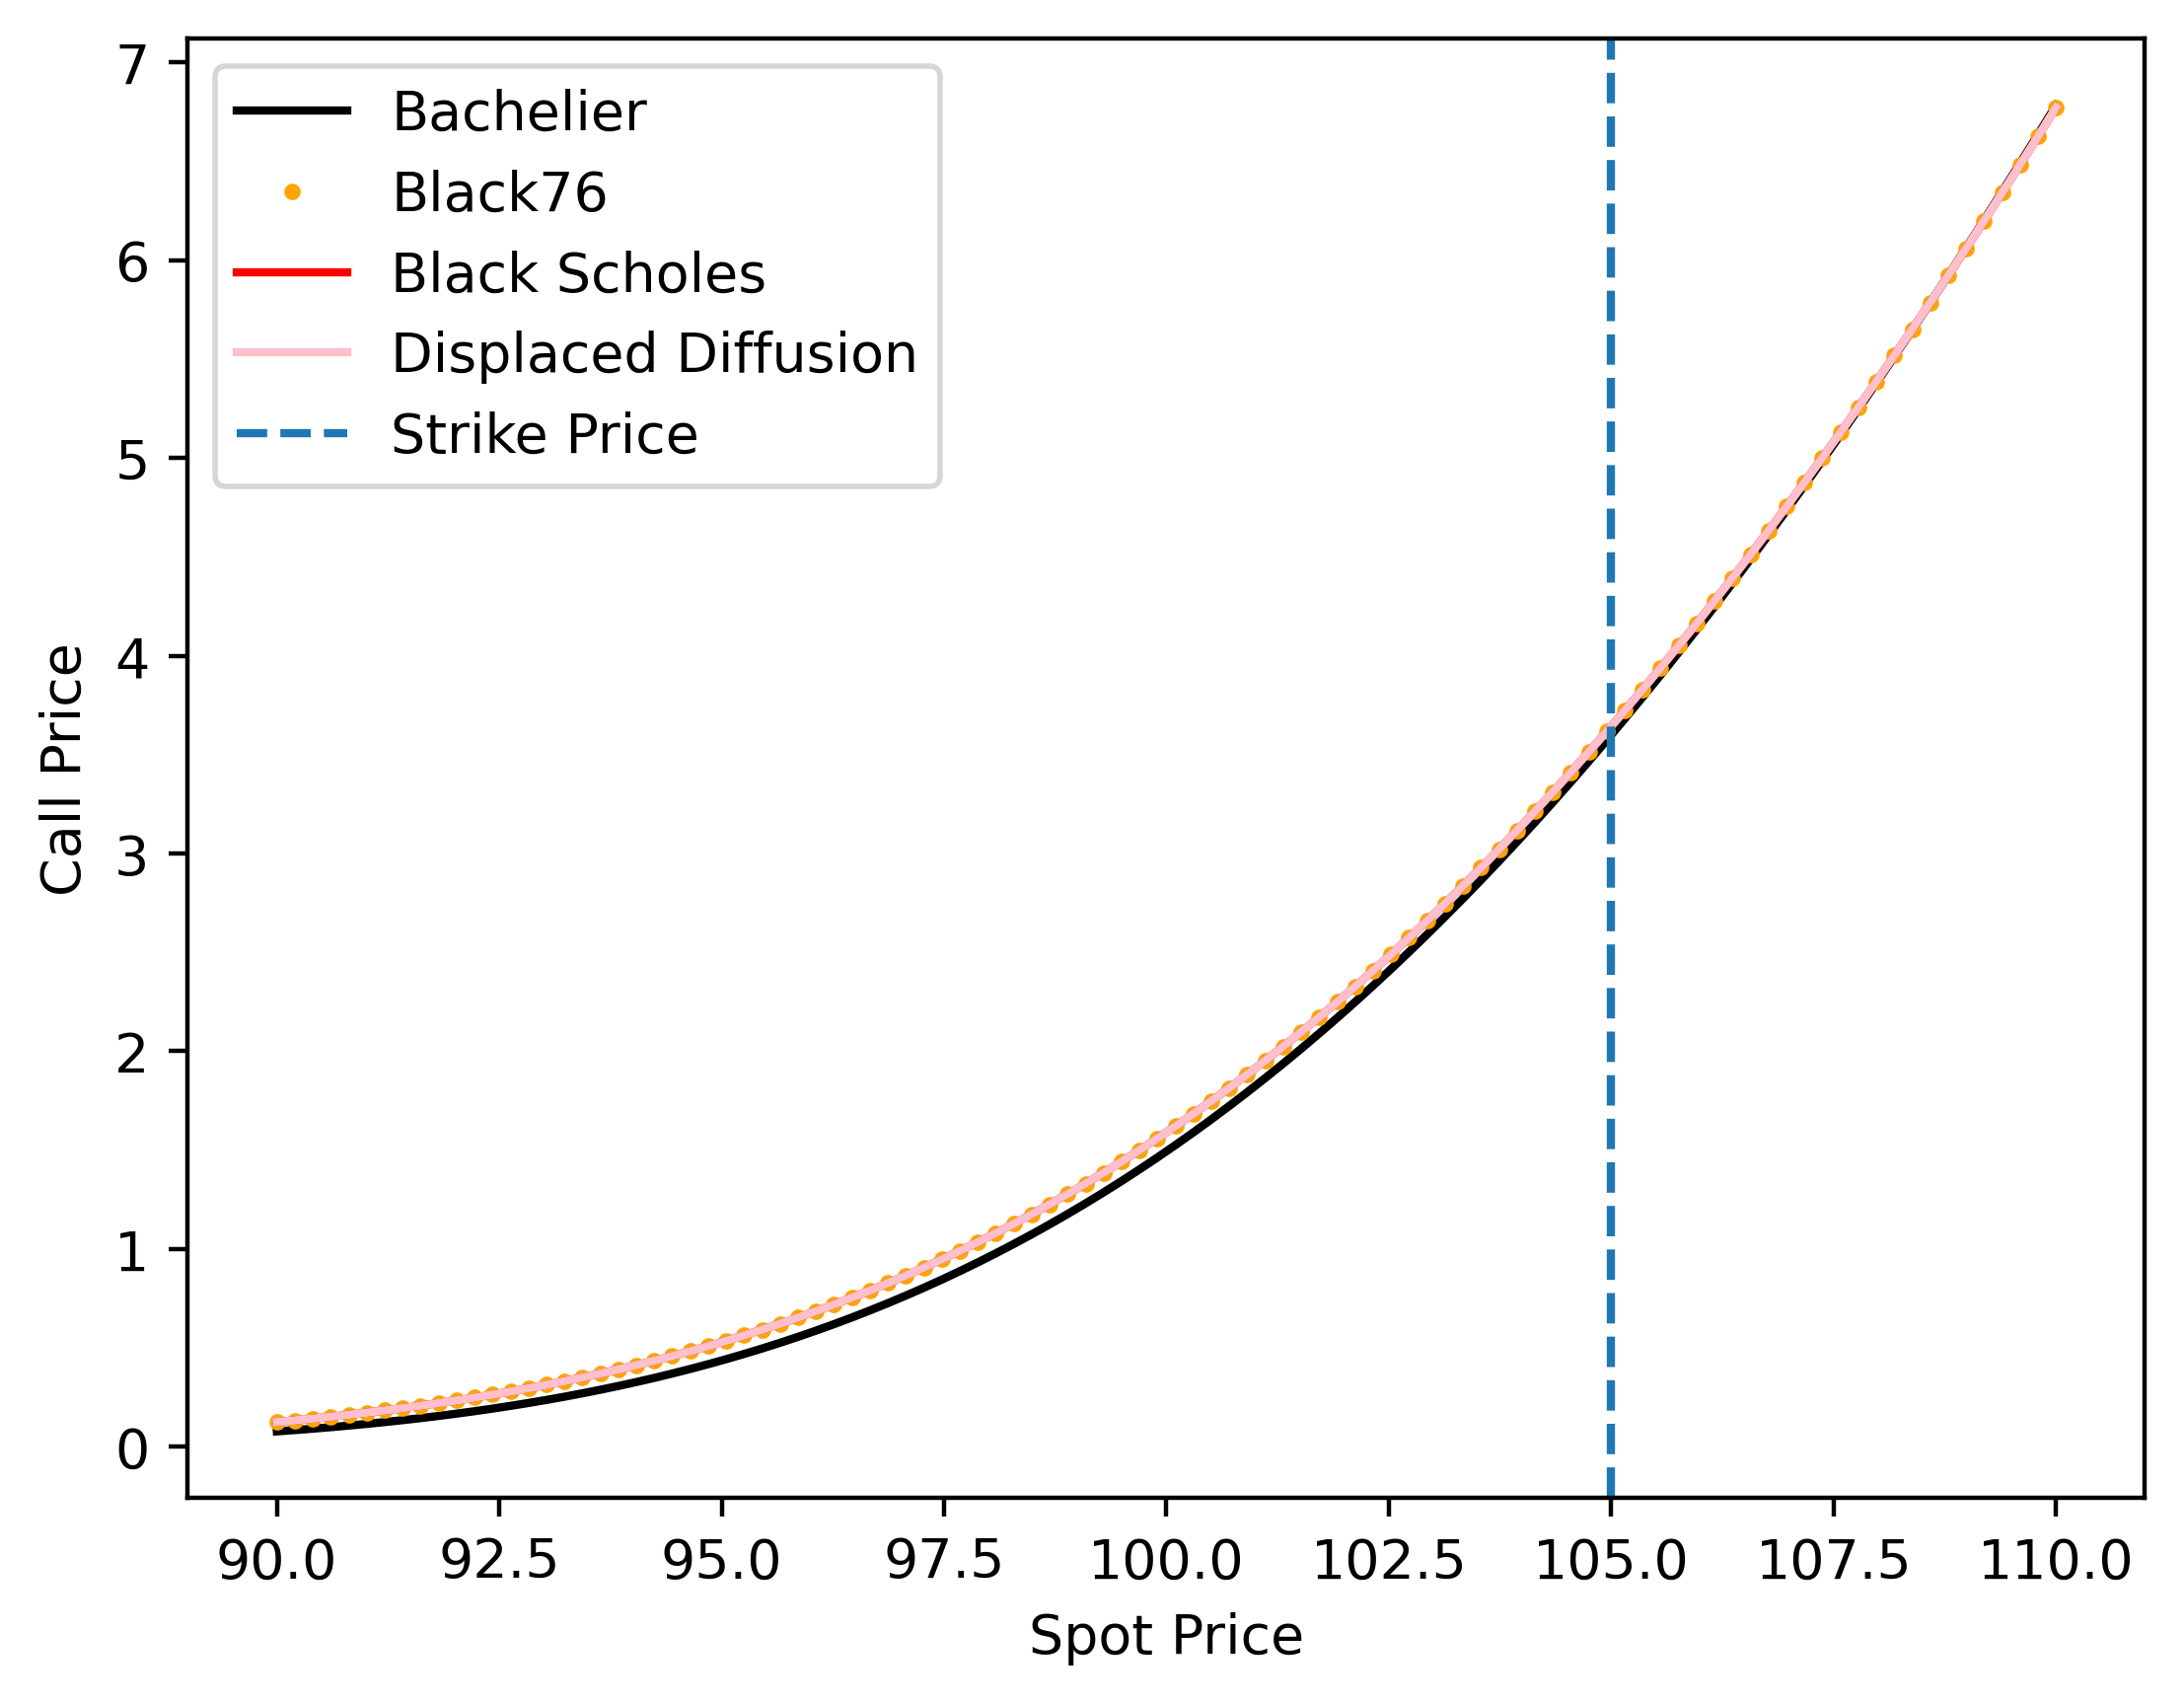

In [8]:
plt.figure(dpi=400)
plt.plot(S,call,color='black',label='Bachelier')
plt.plot(S,call_b76,'o',markersize=2,color='orange',label='Black76')
plt.plot(S,call_b,color='Red',label='Black Scholes')
plt.plot(S,call_dd,color='Pink',label='Displaced Diffusion')
plt.xlabel('Spot Price')
plt.ylabel('Call Price')
plt.axvline(x=K,ls='--',label='Strike Price')
plt.legend()
plt.show()

In [9]:
T = 30/365
sigma = 0.3
K = 105
r = 0.01
S = np.linspace(90, 110, 100)
F = S*np.exp(r*T)

#displaced-diffusion:
beta = 0.9999

In [10]:
put_b76 = []
for i in range(len(F)):
    black76 = Black76(F[i], K, sigma, T, r)
    put_b76.append(black76.PriceVanila('put'))

In [11]:
put_b = []
for i in range(len(S)):
    blackscholes = BlackScholes(S[i], K, sigma, T, r)
    put_b.append(blackscholes.PriceVanila('put'))

In [12]:
put = []
for i in range(len(S)):
    bachelier = Bachelier(S[i], K, sigma*S[i], T, r)
    put.append(bachelier.PriceVanila('put'))

In [13]:
put_dd = []
for i in range(len(S)):
    displacedD = DisplacedDiffusion(F[i], K, sigma, T, r, beta)
    put_dd.append(displacedD.PriceVanila('put'))

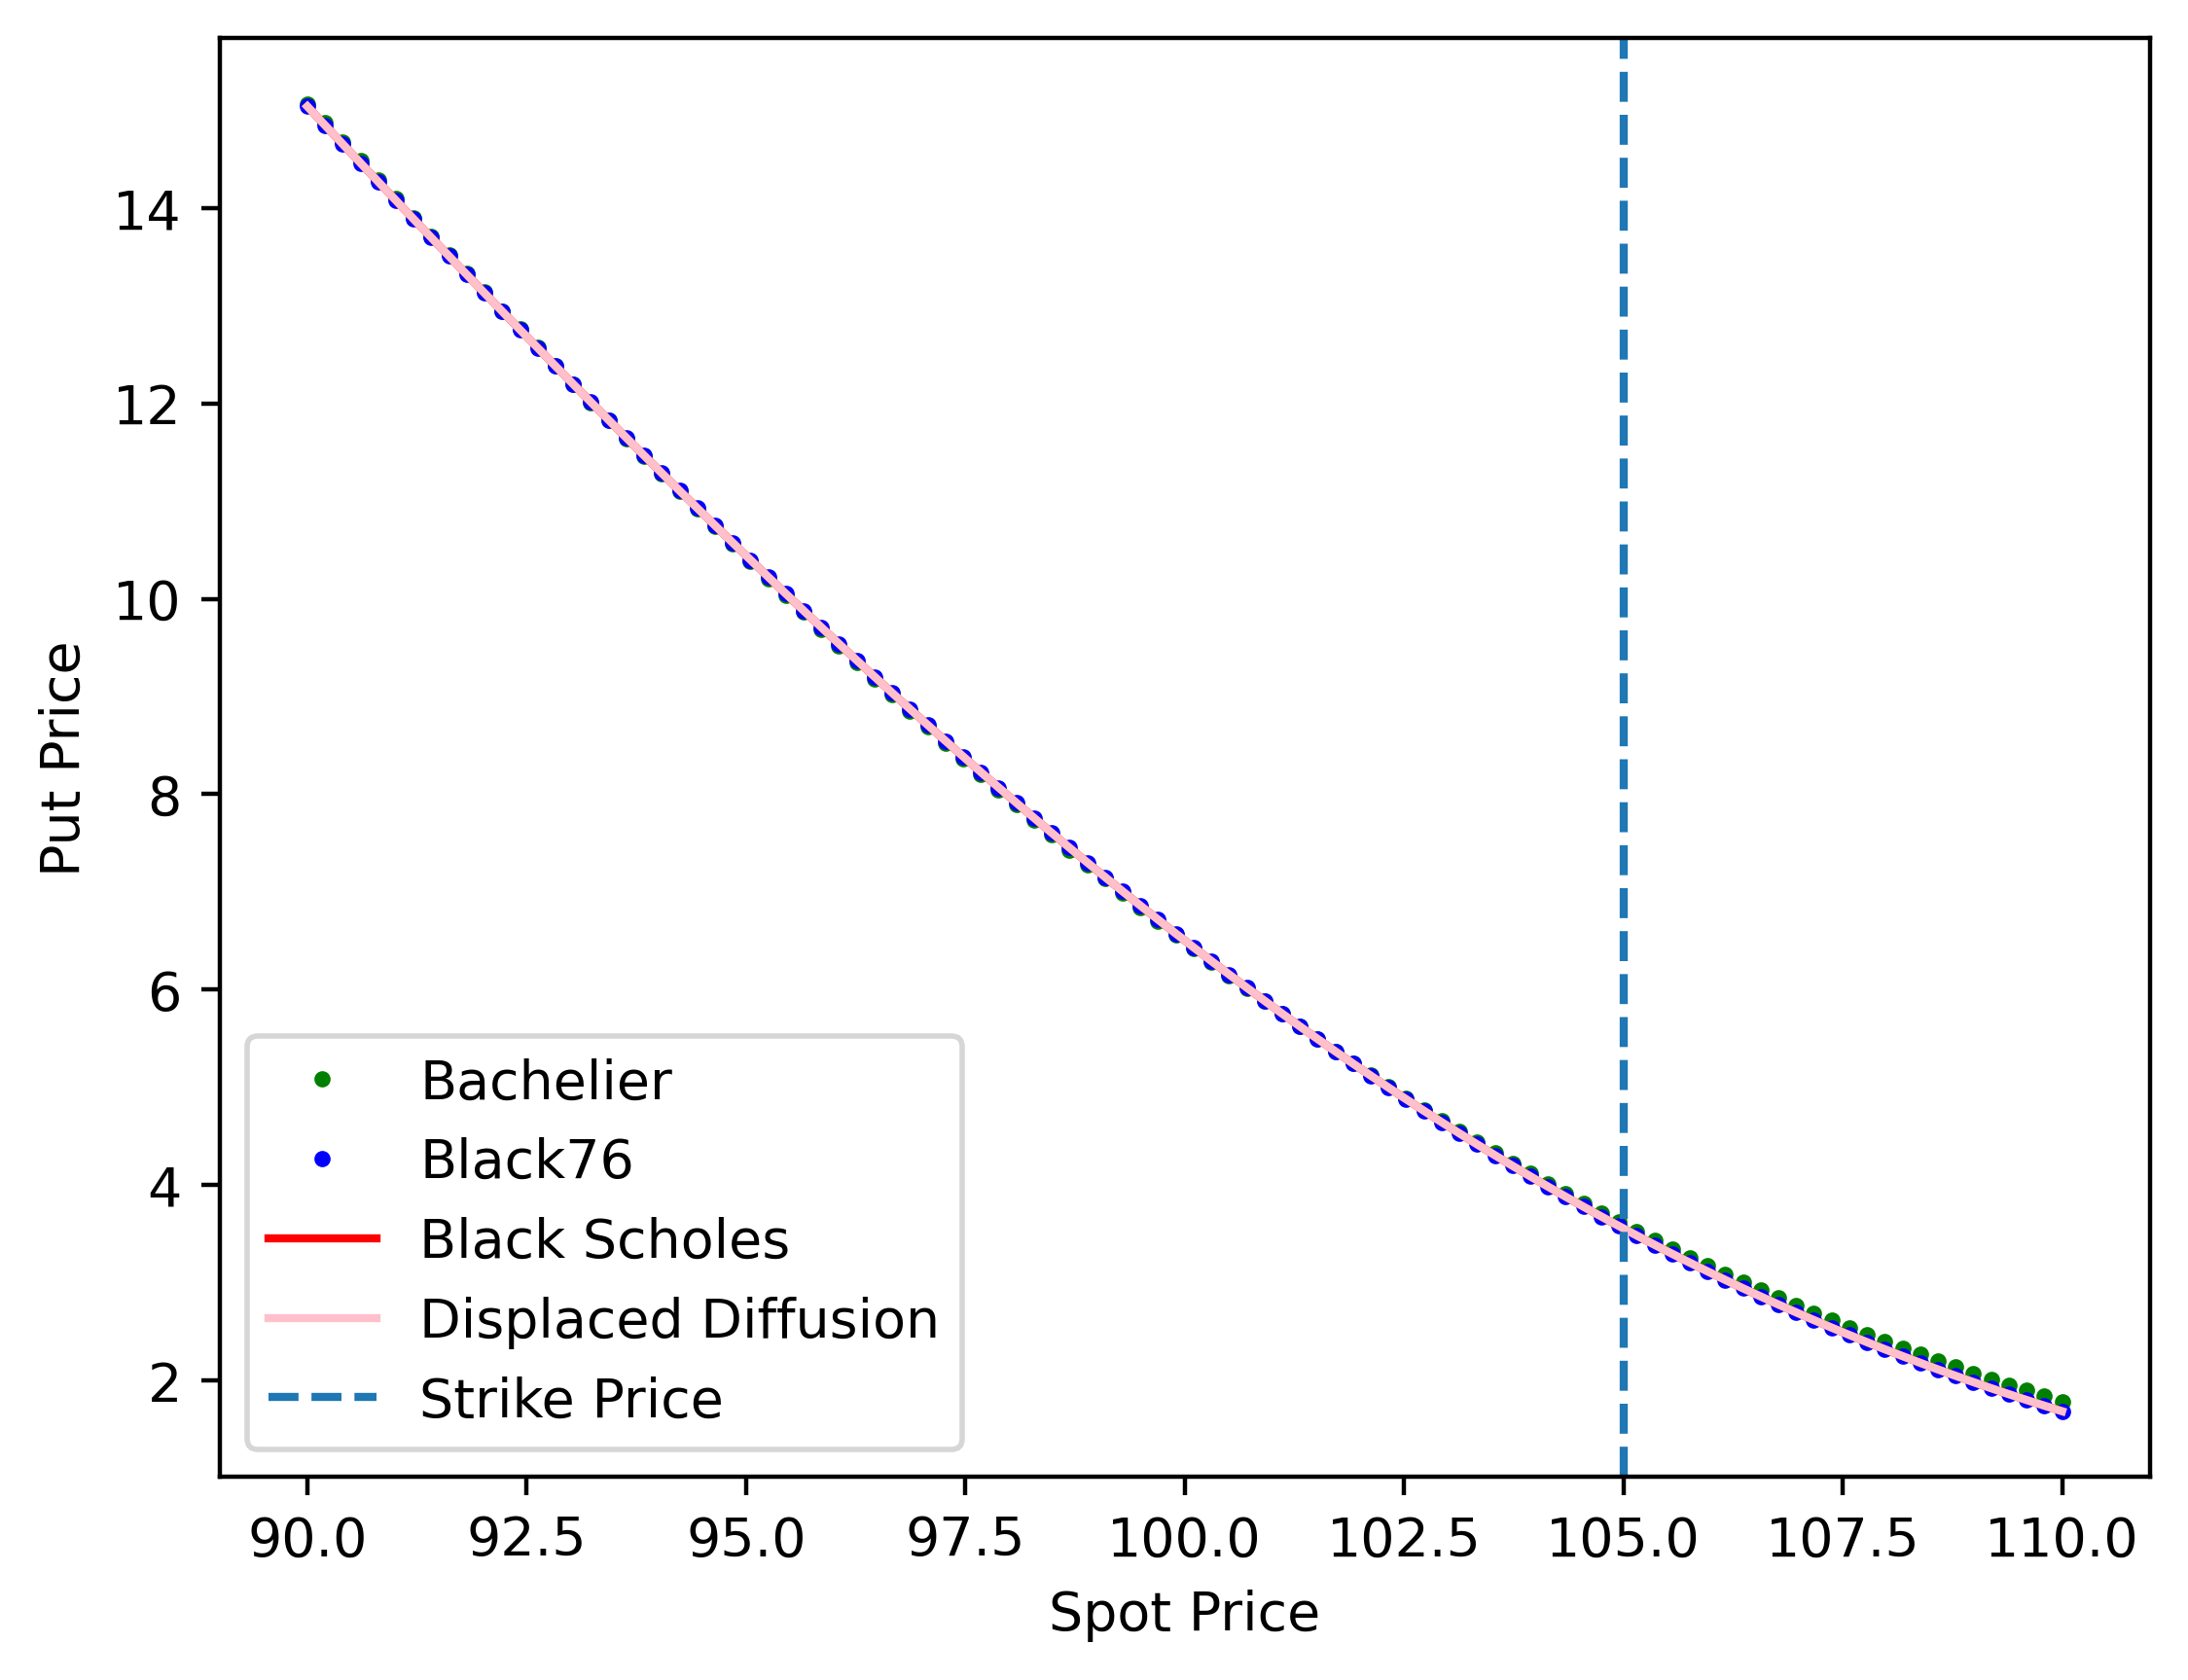

In [14]:
plt.figure(dpi=400)
plt.plot(S,put,'o',color='green',markersize=2,label='Bachelier')
plt.plot(S,put_b76,'o',markersize=2,color='blue',label='Black76')
plt.plot(S,put_b,color='Red',label='Black Scholes')
plt.plot(S,put_dd,color='Pink',label='Displaced Diffusion')
plt.xlabel('Spot Price')
plt.ylabel('Put Price')
plt.axvline(x=K,ls='--',label='Strike Price')
plt.legend()
plt.show()

> ### Cash Or Nothing Call/Put

In [15]:
T = 30/365
sigma = 0.3
K = 105
r = 0.01
S = np.linspace(90, 110, 100)
F = S*np.exp(r*T)

#displaced-diffusion:
beta = 0.9999

In [16]:
call_b76 = []
for i in range(len(F)):
    black76 = Black76(F[i], K, sigma, T, r)
    call_b76.append(black76.PriceCashOrNothing(1,'call'))

call_b = []
for i in range(len(S)):
    blackscholes = BlackScholes(S[i], K, sigma, T, r)
    call_b.append(blackscholes.PriceCashOrNothing(1,'call'))
    
call = []
for i in range(len(S)):
    bachelier = Bachelier(S[i], K, sigma*S[i], T, r)
    call.append(bachelier.PriceCashOrNothing('call'))
    
call_dd = []
for i in range(len(F)):
    displacedD = DisplacedDiffusion(F[i], K, sigma, T, r, beta)
    call_dd.append(displacedD.PriceCashOrNothing(1,'call'))

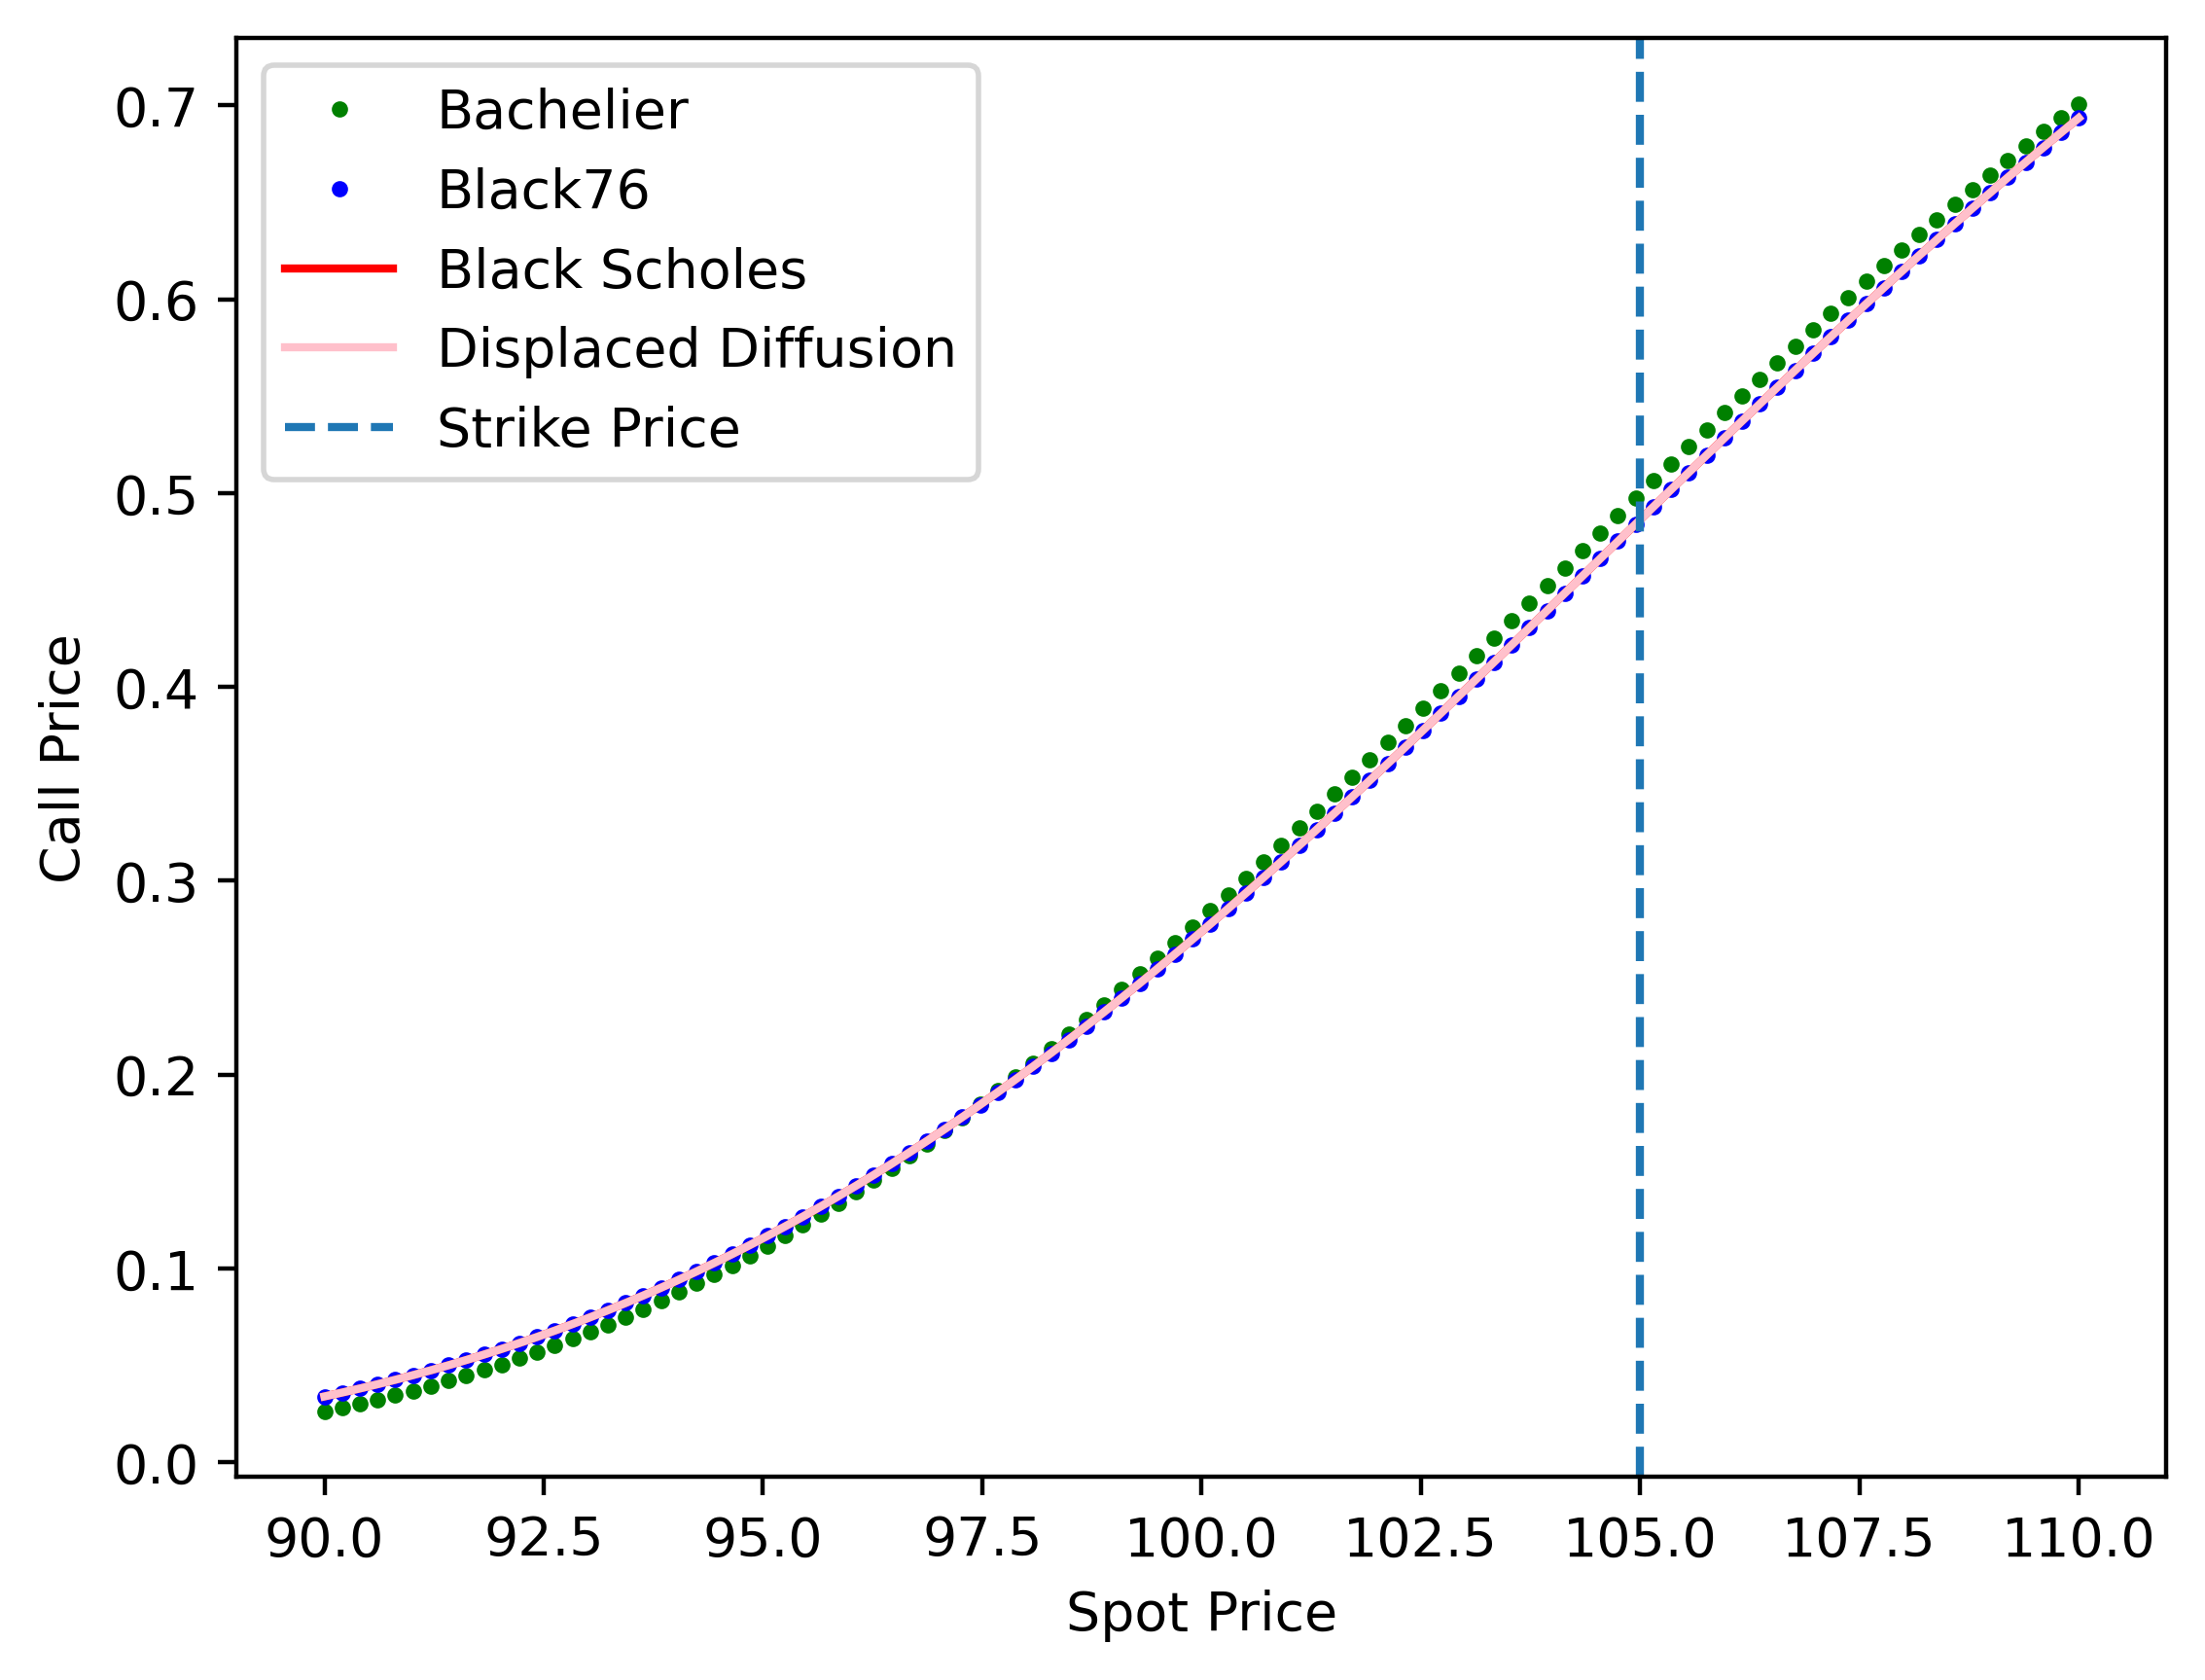

In [17]:
plt.figure(dpi=400)
plt.plot(S,call,'o',color='green',markersize=2,label='Bachelier')
plt.plot(S,call_b76,'o',markersize=2,color='blue',label='Black76')
plt.plot(S,call_b,color='Red',label='Black Scholes')
plt.plot(S,call_dd,color='Pink',label='Displaced Diffusion')
plt.xlabel('Spot Price')
plt.ylabel('Call Price')
plt.axvline(x=K,ls='--',label='Strike Price')
plt.legend()
plt.show()

In [18]:
put_b76 = []
for i in range(len(F)):
    black76 = Black76(F[i], K, sigma, T, r)
    put_b76.append(black76.PriceCashOrNothing(1,'put'))

put_b = []
for i in range(len(S)):
    blackscholes = BlackScholes(S[i], K, sigma, T, r)
    put_b.append(blackscholes.PriceCashOrNothing(1,'put'))
    
put = []
for i in range(len(S)):
    bachelier = Bachelier(S[i], K, sigma*S[i], T, r)
    put.append(bachelier.PriceCashOrNothing('put'))

put_dd = []
for i in range(len(F)):
    displacedD = DisplacedDiffusion(F[i], K, sigma, T, r, beta)
    put_dd.append(displacedD.PriceCashOrNothing(1,'put'))

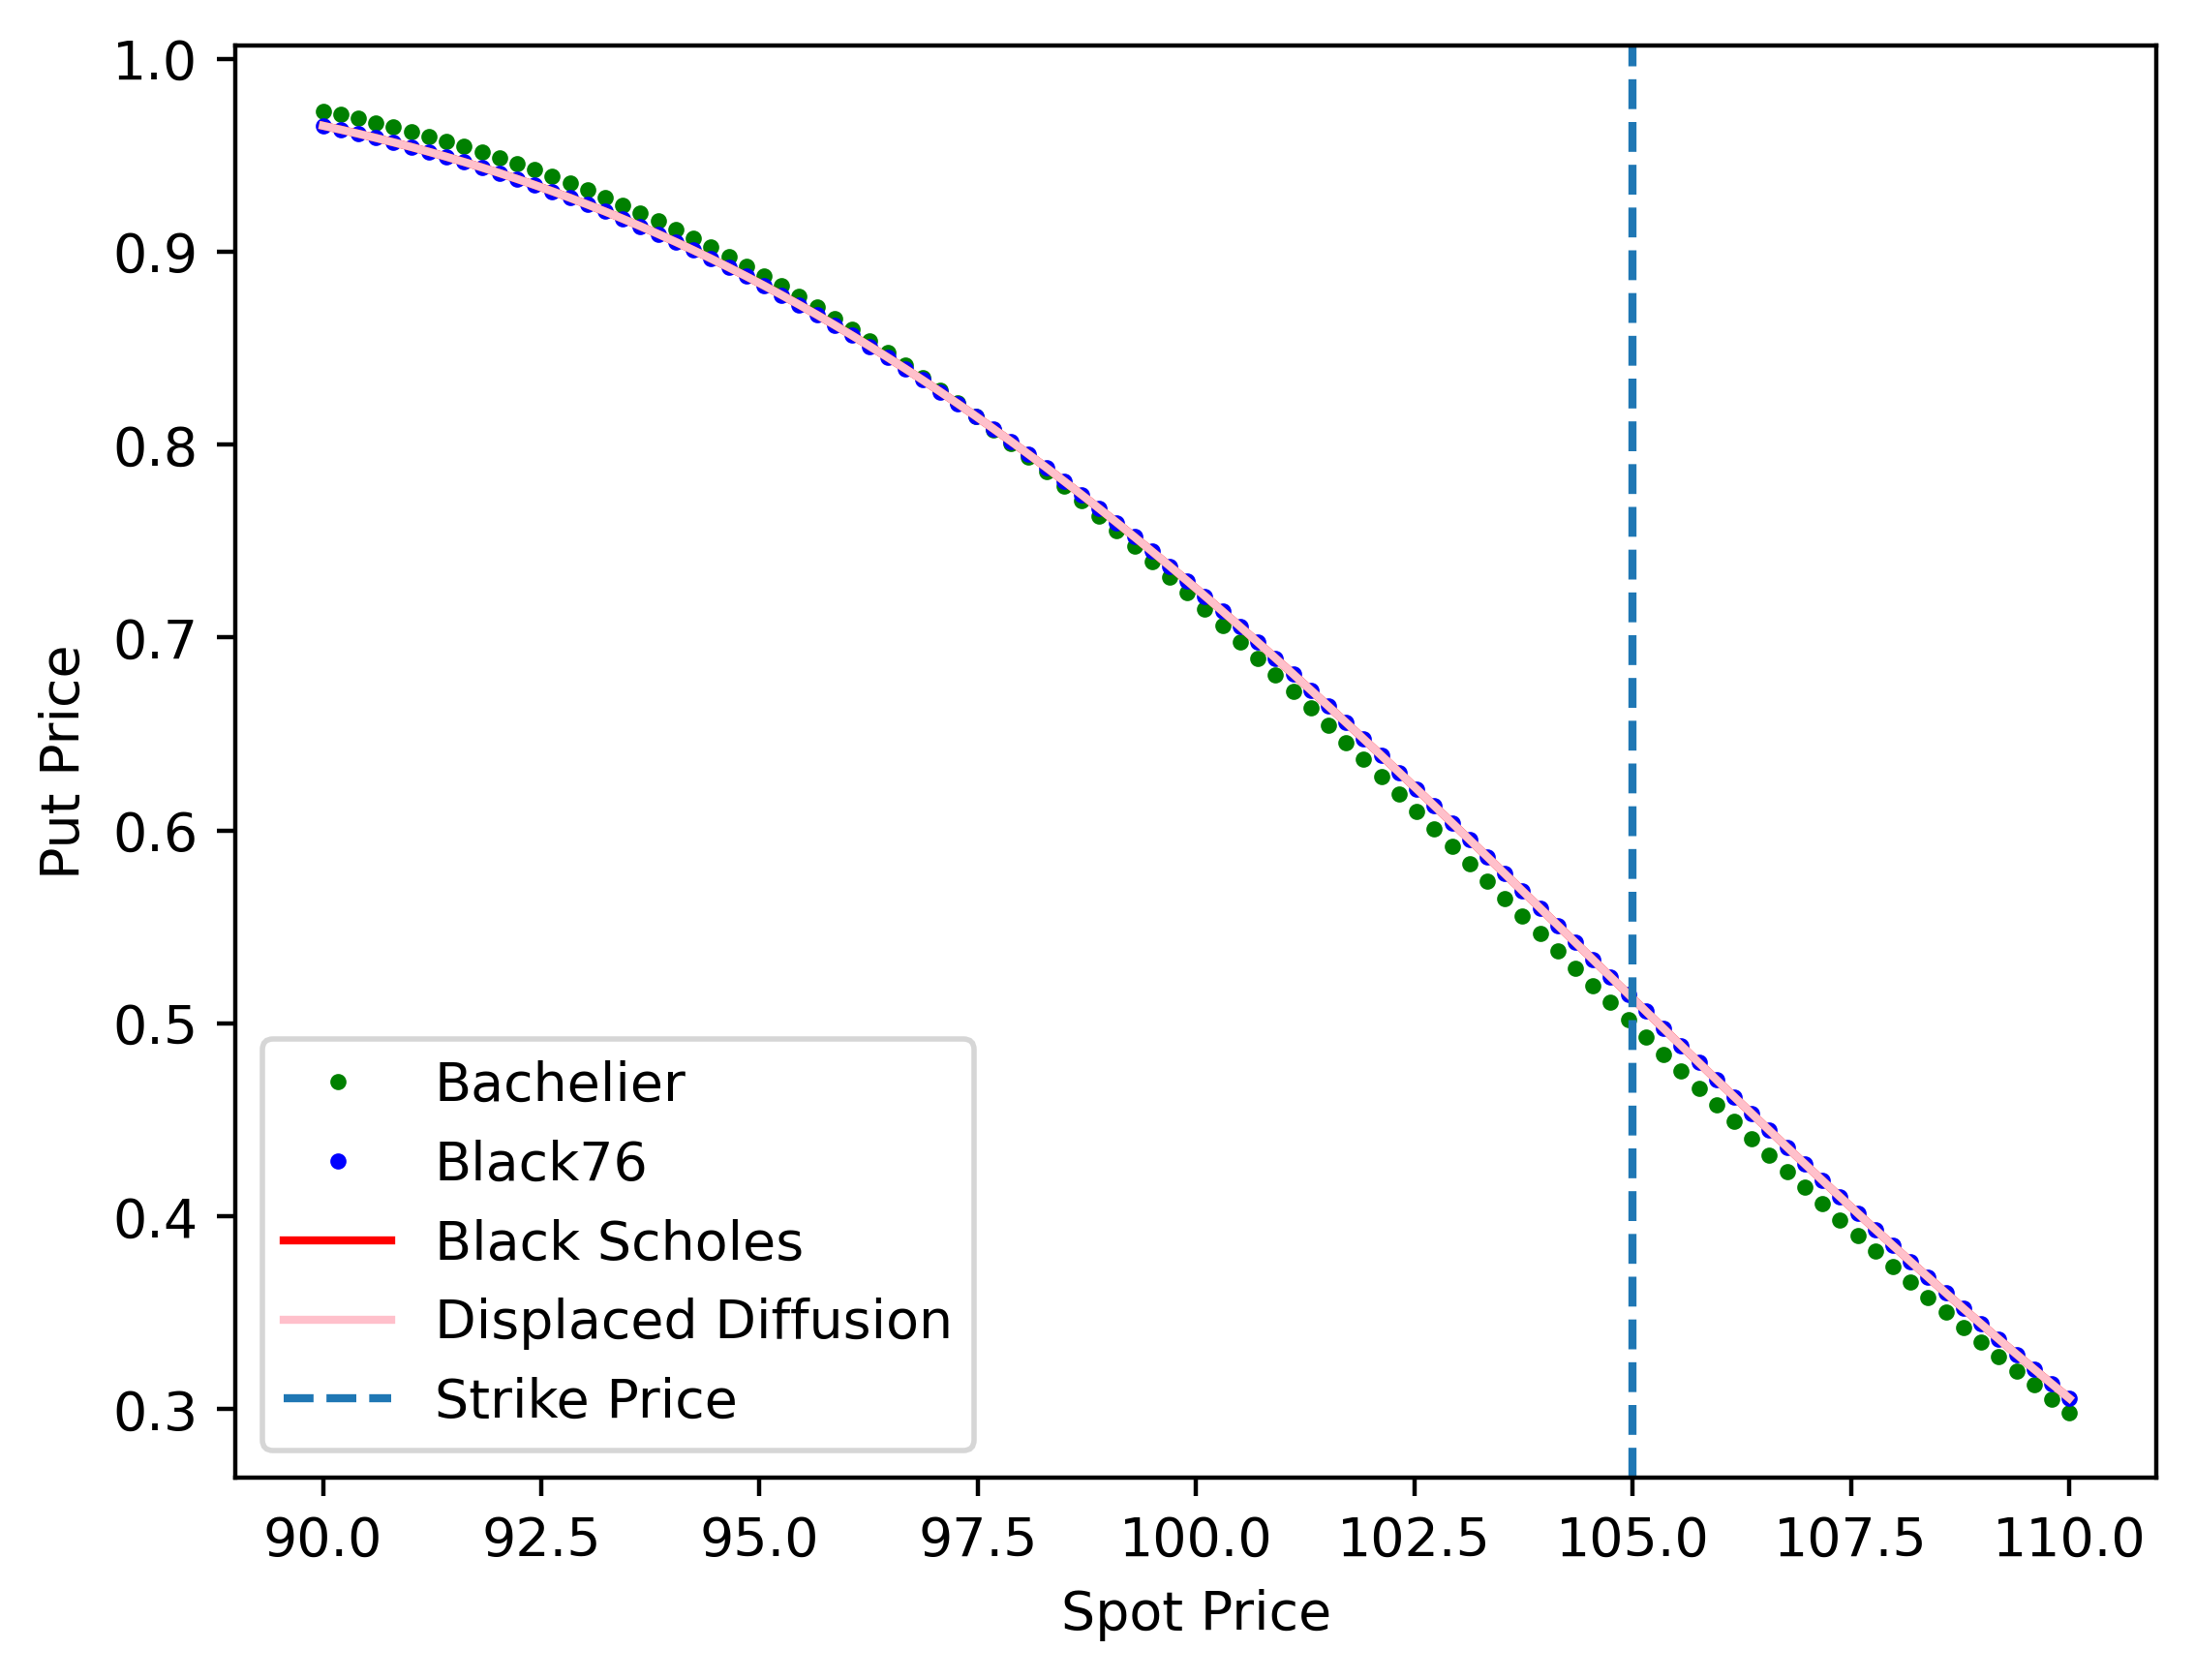

In [19]:
plt.figure(dpi=400)
plt.plot(S,put,'o',color='green',markersize=2,label='Bachelier')
plt.plot(S,put_b76,'o',markersize=2,color='blue',label='Black76')
plt.plot(S,put_b,color='Red',label='Black Scholes')
plt.plot(S,put_dd,color='Pink',label='Displaced Diffusion')
plt.xlabel('Spot Price')
plt.ylabel('Put Price')
plt.axvline(x=K,ls='--',label='Strike Price')
plt.legend()
plt.show()

> ### Asset Or Nothing Call/Put

In [20]:
T = 30/365
sigma = 0.3
K = 105
r = 0.01
S = np.linspace(90, 110, 100)
F = S*np.exp(r*T)

#displaced-diffusion:
beta = 0.9999

In [21]:
call_b76 = []
for i in range(len(S)):
    black76 = Black76(F[i], K, sigma, T, r)
    call_b76.append(black76.PriceAssetOrNothing('call'))

call_b = []
for i in range(len(S)):
    blackscholes = BlackScholes(S[i], K, sigma, T, r)
    call_b.append(blackscholes.PriceAssetOrNothing('call'))
    
call = []
for i in range(len(S)):
    bachelier = Bachelier(S[i], K, sigma*S[i], T, r)
    call.append(bachelier.PriceAssetOrNothing('call'))
    
call_dd = []
for i in range(len(F)):
    displacedD = DisplacedDiffusion(F[i], K, sigma, T, r, beta)
    call_dd.append(displacedD.PriceAssetOrNothing('Call'))

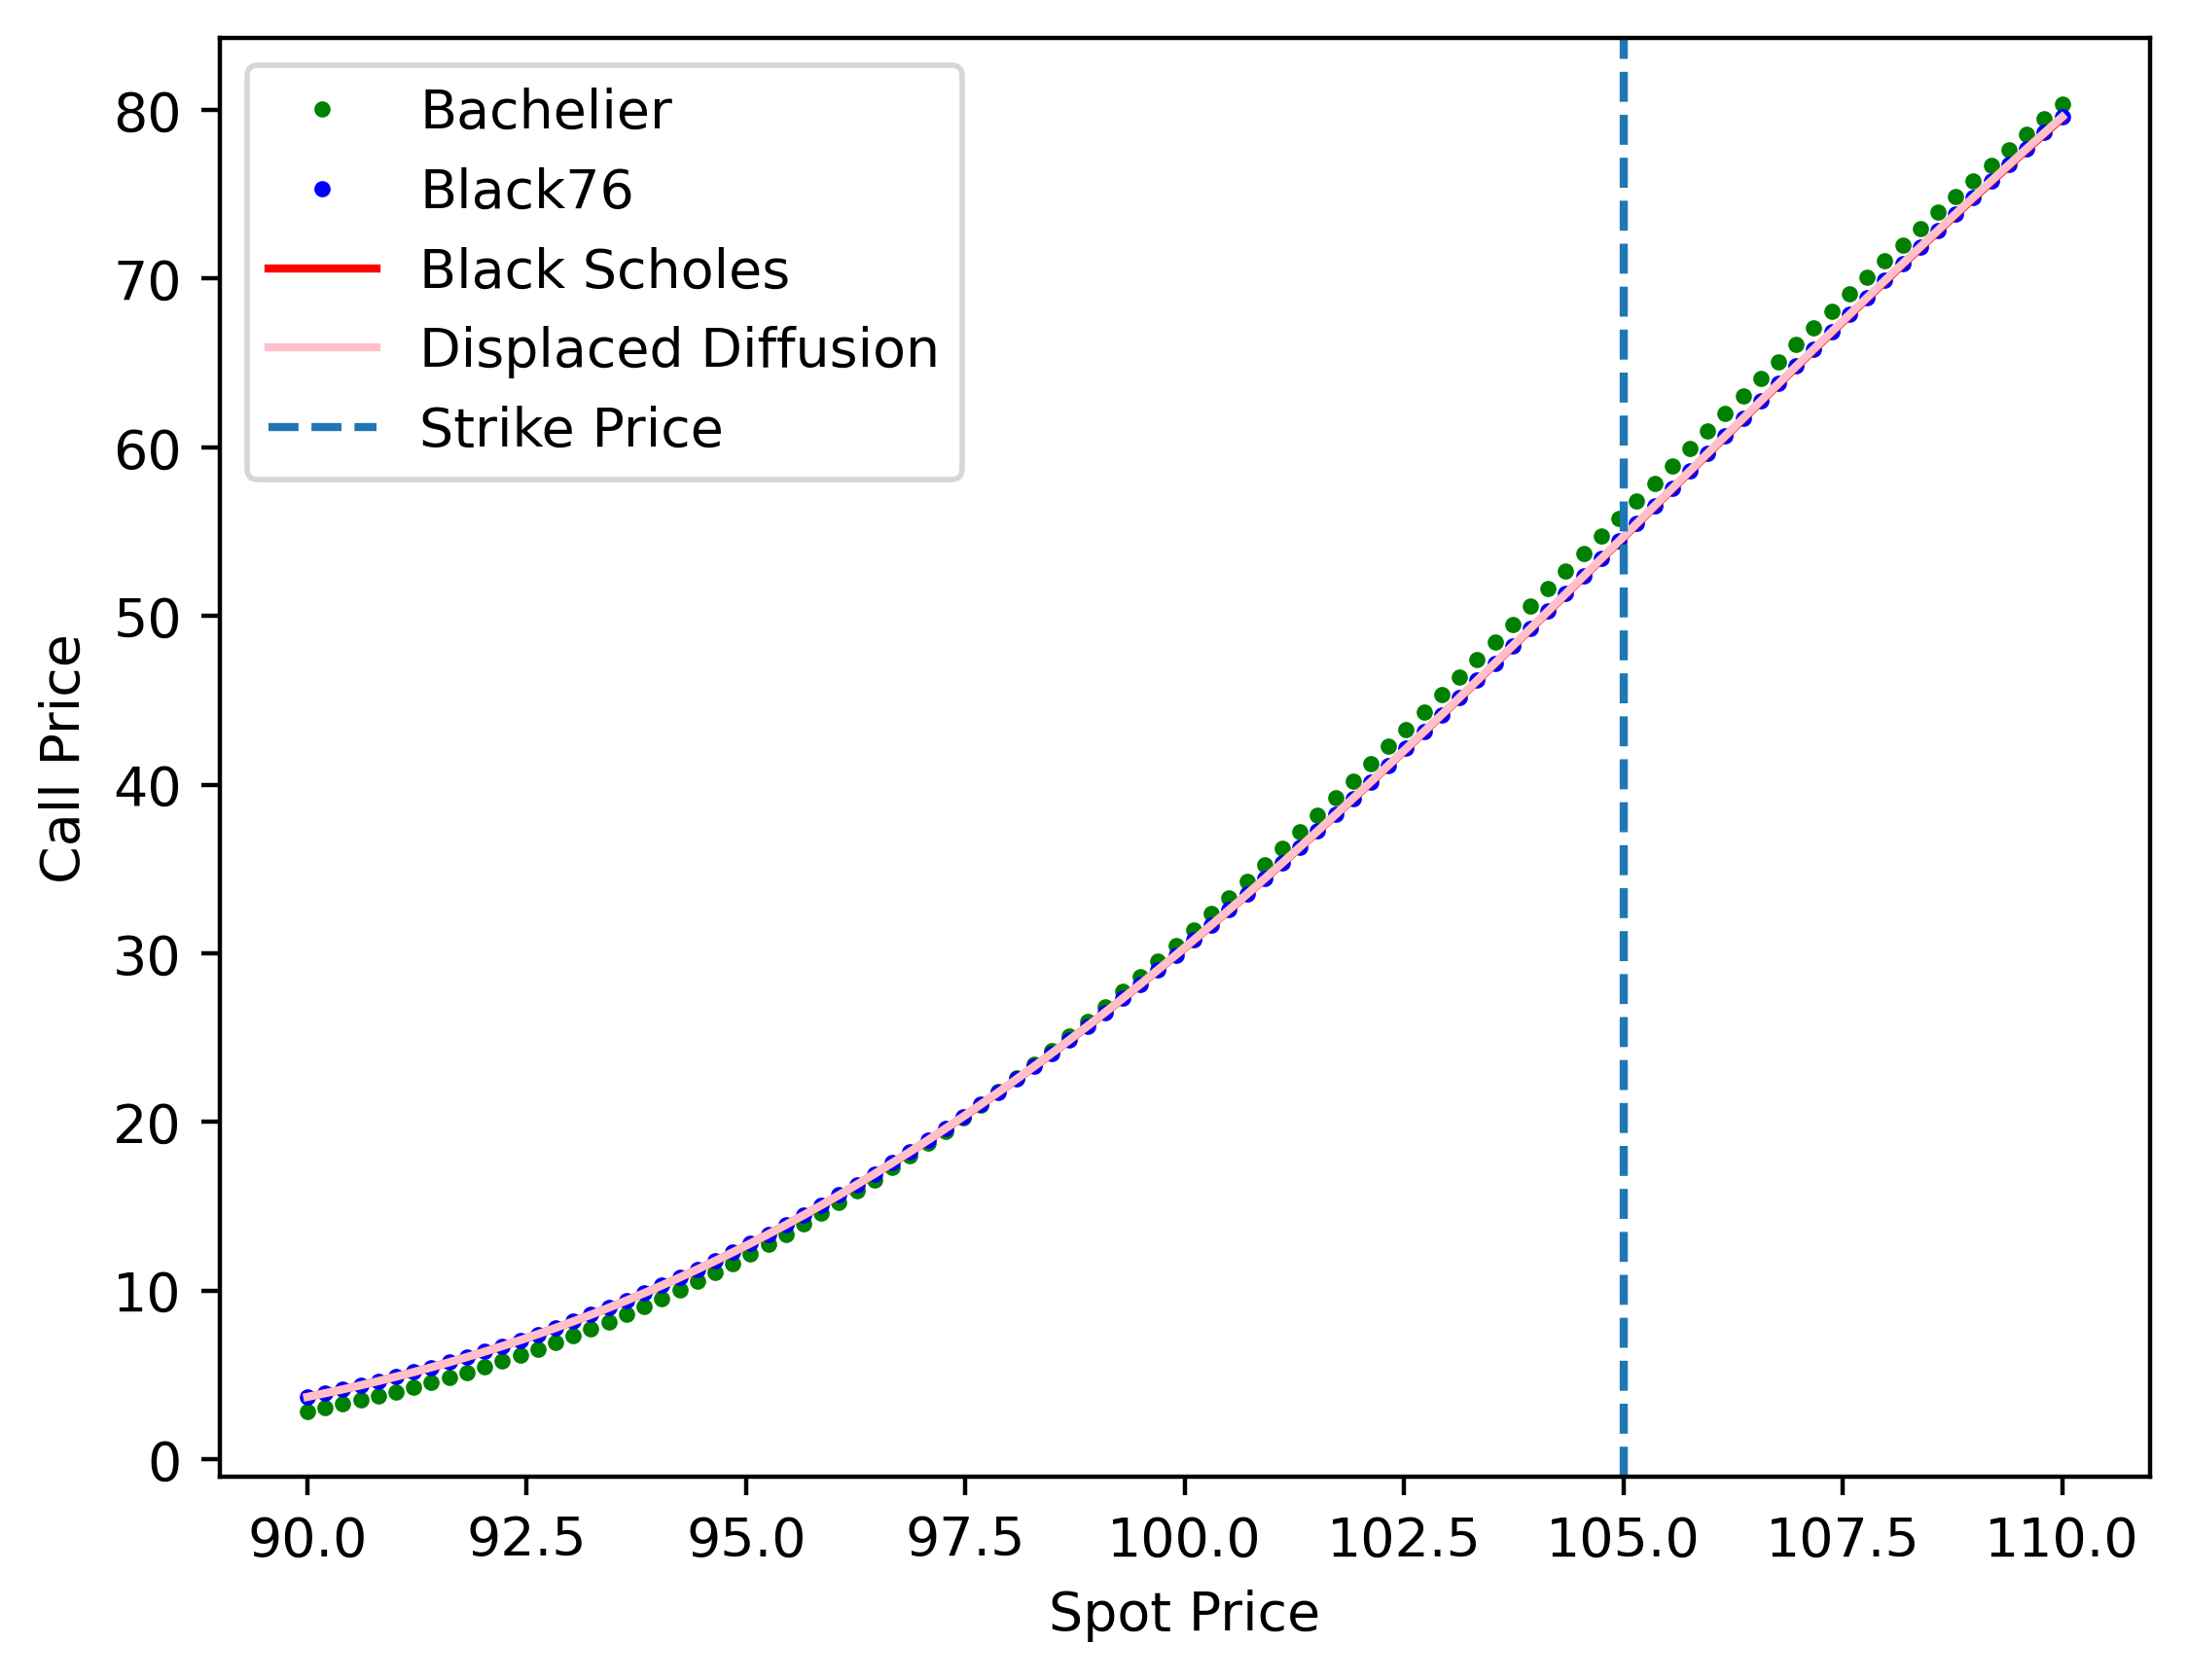

In [22]:
plt.figure(dpi=400)
plt.plot(S,call,'o',color='green',markersize=2,label='Bachelier')
plt.plot(S,call_b76,'o',markersize=2,color='blue',label='Black76')
plt.plot(S,call_b,color='Red',label='Black Scholes')
plt.plot(S,call_dd,color='Pink',label='Displaced Diffusion')
plt.xlabel('Spot Price')
plt.ylabel('Call Price')
plt.axvline(x=K,ls='--',label='Strike Price')
plt.legend()
plt.show()

In [23]:
put_b76 = []
for i in range(len(S)):
    black76 = Black76(F[i], K, sigma, T, r)
    put_b76.append(black76.PriceAssetOrNothing('put'))

put_b = []
for i in range(len(S)):
    blackscholes = BlackScholes(S[i], K, sigma, T, r)
    put_b.append(blackscholes.PriceAssetOrNothing('put'))
    
put = []
for i in range(len(S)):
    bachelier = Bachelier(S[i], K, sigma*S[i], T, r)
    put.append(bachelier.PriceAssetOrNothing('put'))
    
put_dd = []
for i in range(len(F)):
    displacedD = DisplacedDiffusion(F[i], K, sigma, T, r, beta)
    put_dd.append(displacedD.PriceAssetOrNothing('put'))

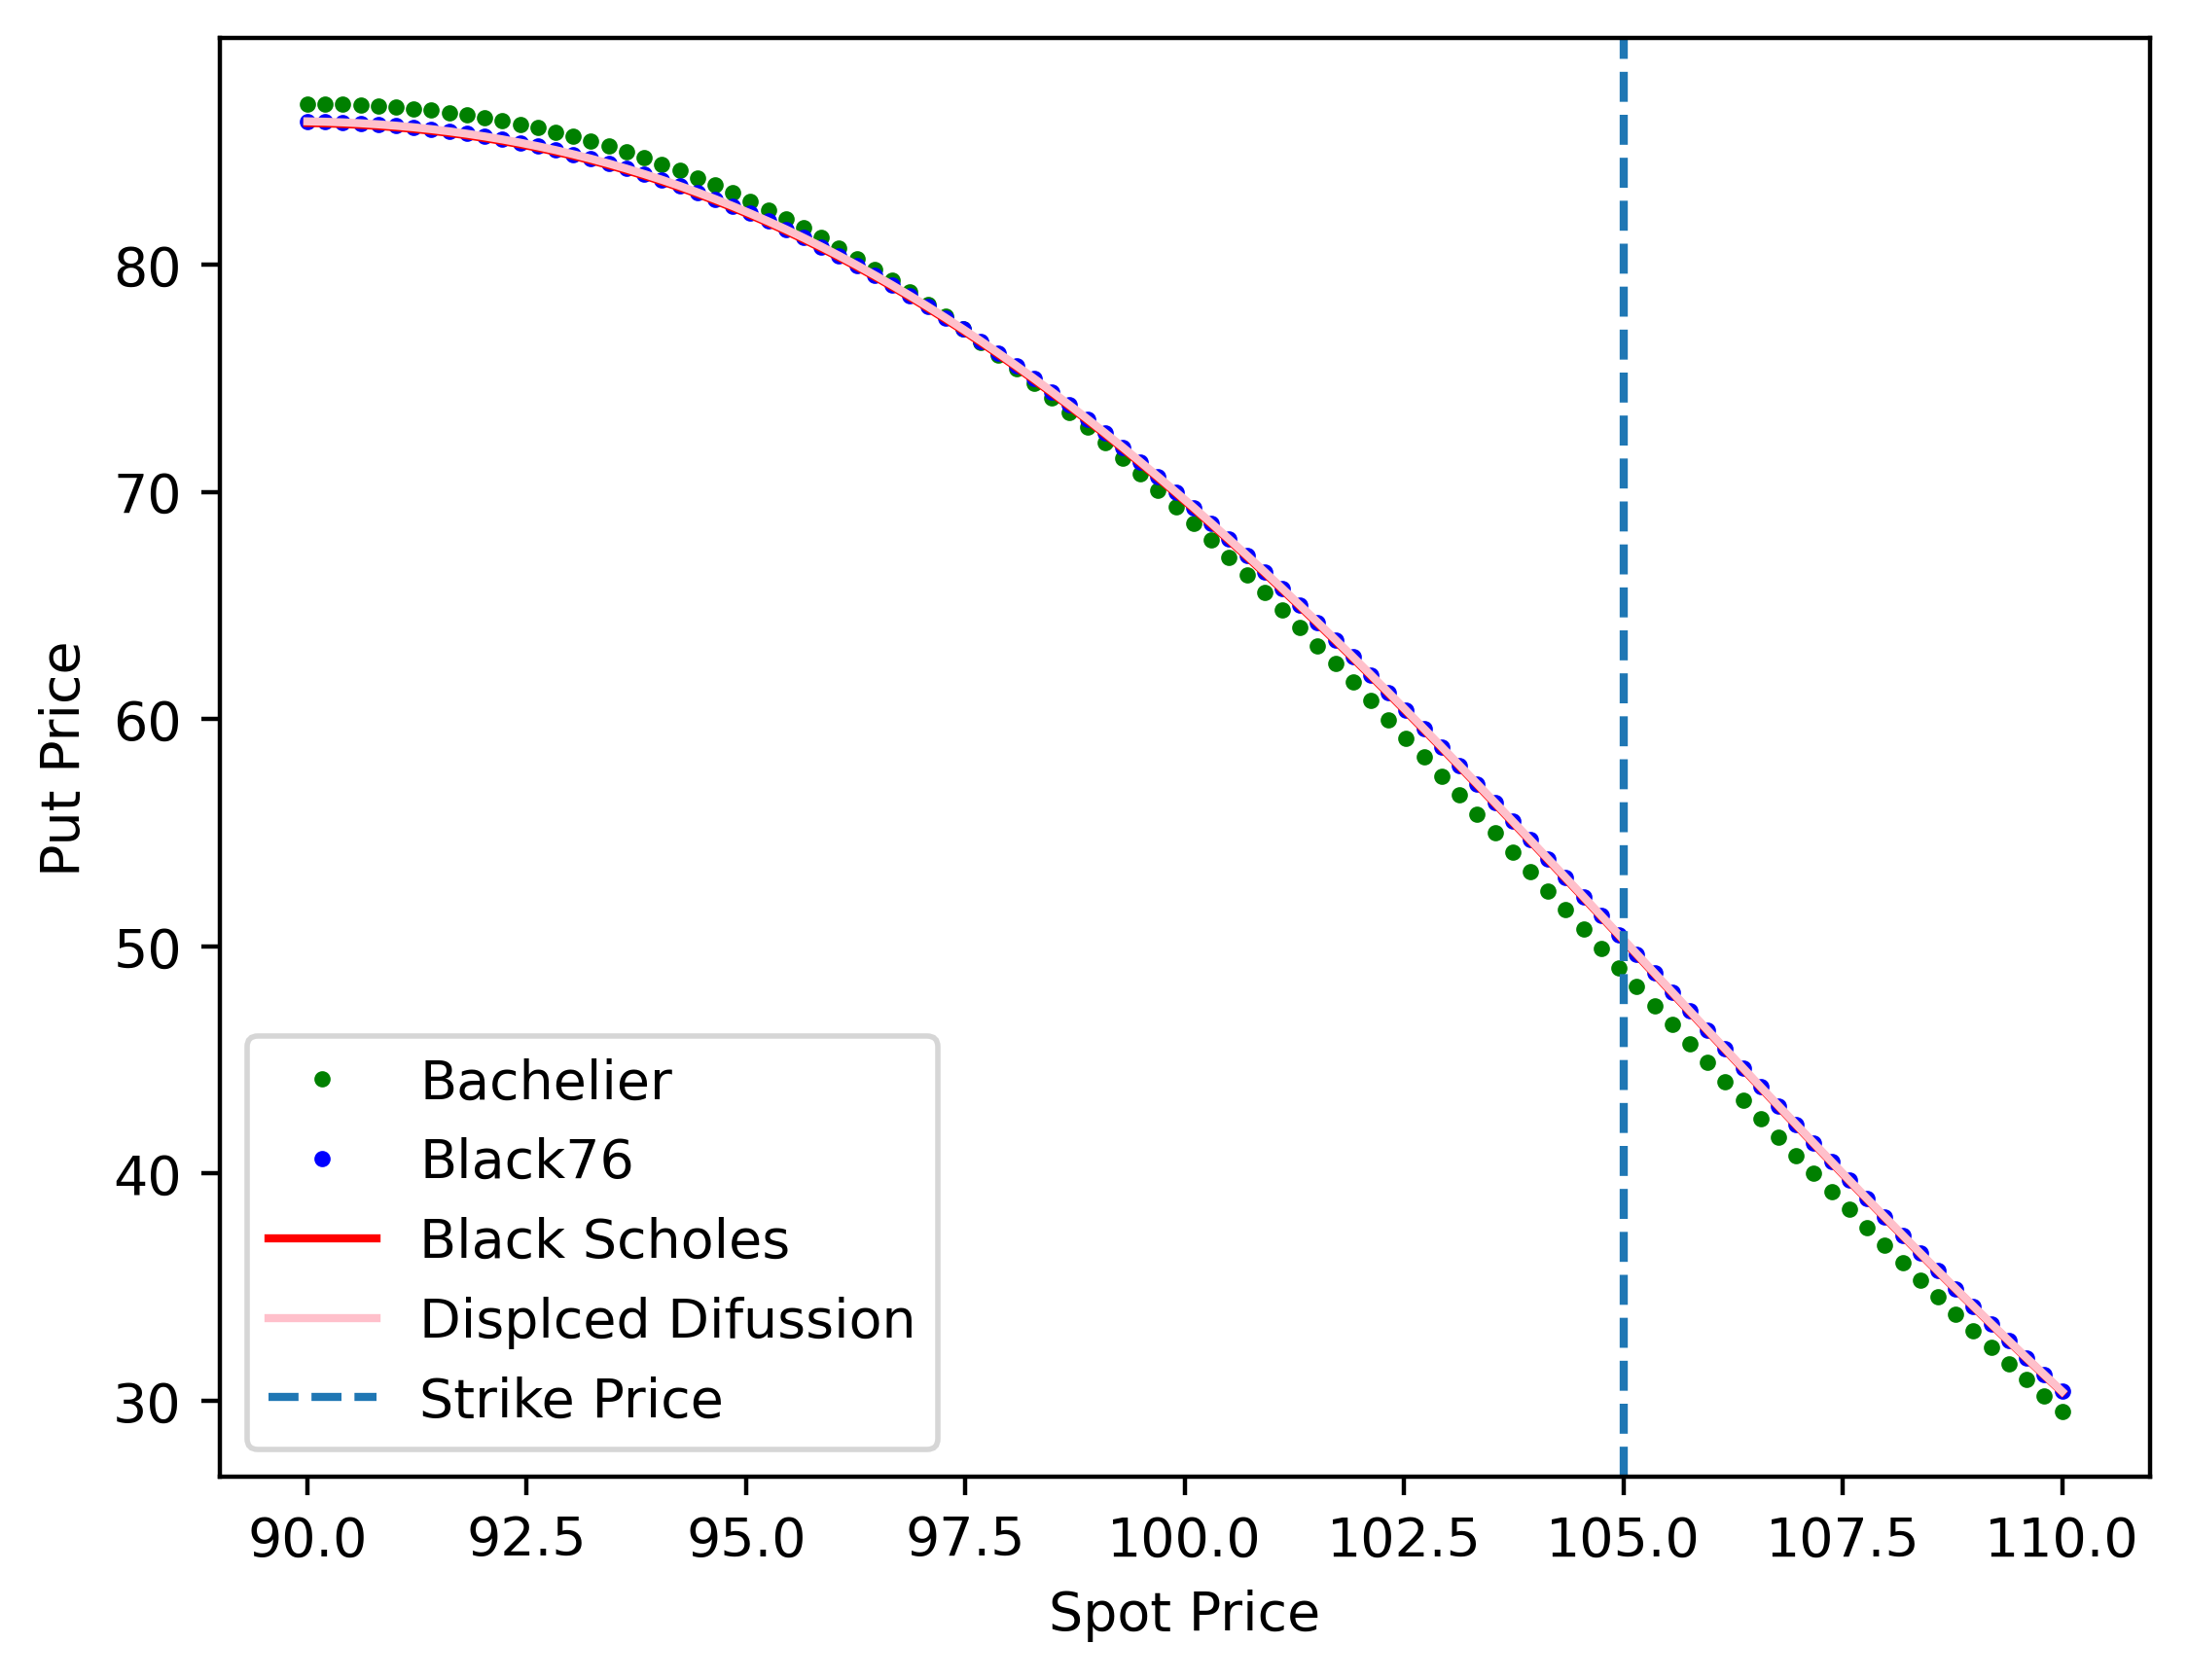

In [24]:
plt.figure(dpi=400)
plt.plot(S,put,'o',color='green',markersize=2,label='Bachelier')
plt.plot(S,put_b76,'o',markersize=2,color='blue',label='Black76')
plt.plot(S,put_b,color='Red',label='Black Scholes')
plt.plot(S,put_dd,color='Pink',label='Displced Difussion')
plt.xlabel('Spot Price')
plt.ylabel('Put Price')
plt.axvline(x=K,ls='--',label='Strike Price')
plt.legend()
plt.show()